# Applying a filter to the nuclei image

In [78]:
from __future__ import division

The goal of image preprocessing is to prepare or optimize the images to:   
  
  + remove noises
  + sharpen contrast 
  + high contour 
  + detect edges   

The specific preprocessing steps used in a pipeline depend on the type of image, the microscopy technique used, the image quality, and the desired downstream analysis.
In this pipeline we will be using a **median filter**.

Median filtering is useful as a **smoothing technique** to reduce noice. The median filter considers each pixel in the image in turn and looks at its nearby neighbors to decide whether or not it is representative of its surroundings. Instead of simply replacing the pixel value with the mean of neighboring pixel values, it replaces it with the median of those values. The median is calculated by sorting all the pixel values from the **surrounding neighborhood** into numerical order and returning the pixel value in the middle.

## Exercices  1 -  Connect  to the omero server

In [62]:
# Import BlitzGateway from omero.gateway to access API
from omero.gateway import BlitzGateway

# The getpass() function prints a prompt then reads input from the user until they press return.
# The input is passed back as a string to the caller. For that import getpass from getpass.
from getpass import getpass

# Use raw_input function to print a prompt for username, host and port.
# Warning: For port parameter cast the string to integer.

# Fill the parameters of BlitzGateway function: Username, Password, Host and Port
# Use connect function to connect you to the omero server.
conn = BlitzGateway(
    raw_input("Username: "), getpass("OMERO Password: "),
    host=raw_input("Host: "), port=int(raw_input("Port: ")))
conn.connect()

Username: cedrichk
OMERO Password: ········
Host: omero.mri.cnrs.fr
Port: 4064


True

## Exercices  2 -  Get Images


Images in Dataset: Well-C003
FITC.jpeg 
Hoechst.jpeg 
Tritc.jpeg 
{'FITC': [array([[23, 22, 22, ..., 25, 26, 26],
       [23, 22, 22, ..., 26, 26, 26],
       [22, 22, 22, ..., 26, 26, 26],
       ...,
       [22, 21, 19, ..., 20, 20, 20],
       [22, 21, 20, ..., 20, 20, 20],
       [22, 21, 20, ..., 20, 20, 20]], dtype=uint8)], 'Tritc': [array([[41, 44, 47, ..., 46, 57, 61],
       [36, 40, 43, ..., 54, 58, 58],
       [33, 36, 39, ..., 61, 56, 55],
       ...,
       [23, 22, 21, ..., 17, 17, 17],
       [22, 21, 20, ..., 17, 17, 17],
       [21, 20, 19, ..., 17, 17, 17]], dtype=uint8)], 'Hoechst': [array([[14, 14, 14, ..., 15, 15, 15],
       [14, 14, 14, ..., 15, 15, 15],
       [14, 14, 14, ..., 15, 15, 15],
       ...,
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14]], dtype=uint8)]}


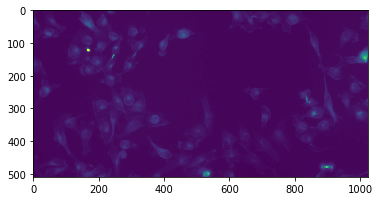

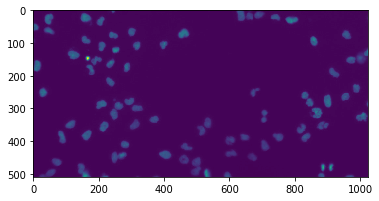

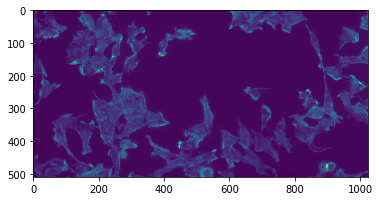

In [76]:
# Create a dictionary that contains a key-value pairing for each image.
# The keys should be a strings describing the name of the image 
# and the values should be empty lists. These empty lists will be filled with the array of image created.

img = {"FITC":[],
       "Hoechst":[],
       "Tritc":[]}


# Create a function to return images from dataset PK-10B and Well-C003 dataset as example.
# This function take two parameters, a dataset_id and the connection variable
# To get an image array you can use getPrimaryPixels() to get all pixels from an image
# For add new element in a list you should use append

import matplotlib.pyplot as plt

def getImagesFrom(dataset_id, conn):
    dataset = conn.getObject("Dataset", dataset_id)
    print "\nImages in Dataset:", dataset.getName()
    for image in dataset.listChildren():
        print image.getName(), image.getDescription()
        pixels = image.getPrimaryPixels()
        image_plane = pixels.getPlane(0, 0, 0)
        if image.getName() == "FITC.jpeg":
            img["FITC"].append(image_plane)
        elif image.getName() == "Hoechst.jpeg":
            img["Hoechst"].append(image_plane)
        else:
            img["Tritc"].append(image_plane)
    return(img)
        
im = getImagesFrom(8595, conn)

# Visualize the list of images obtained using plt.imshow then plt.show
print im
plt.imshow(im['FITC'][0])
plt.show()
plt.imshow(im['Hoechst'][0])
plt.show()
plt.imshow(im['Tritc'][0])
plt.show()

## Exercices 3 - Normalize images

In [82]:
# Normalize images
# In order to compare two images we can use the numpy.iinfo function. This function will show us the range of a 
# data-type, which we can then use to normalize the intensity values in the image.
import numpy
numpy.iinfo(im['FITC'][0].dtype)
im['FITC'][0] = im['FITC'][0] / 255
im['Hoechst'][0] = im['Hoechst'][0] / 255
img["Tritc"][0] = img["Tritc"][0] / 255

## Exercices 4 - Apply median filter on images

In [86]:
# Create a variable for the size of the smoothing filter. 
# Either the sizes of a rectangular kernel or the footprint of the kernel must be provided. 
# The size parameter, if provided, must be a sequence of sizes or a single number in which case the size of 
# the filter is assumed to be equal along all axis. 
# The footprint if provided, must be an array that defines the shape of the kernel by its non-zero elements.
filter_size = 3

In [87]:

# Perform the smoothing on the image
# To do so, use the median filter function 'scipy.ndimage.filters.median_filter' from the 
# image processing package ndimage, which was imported at the start of the tutorial. 
# Check out the documentation of scipy to see how to use this function. 
# Allocate the output to a new variable.
import scipy.ndimage
smoothed_image = scipy.ndimage.filters.median_filter(im['Hoechst'][0], filter_size)

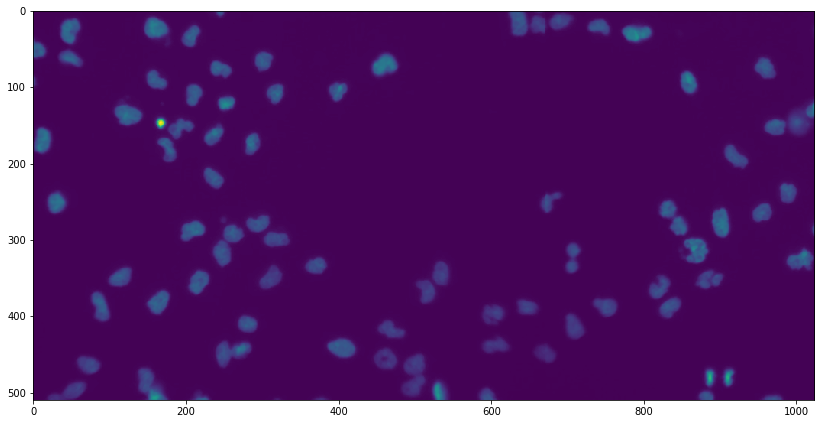

In [88]:
# Visualize the result using plt.imshow and plt.show
plt.figure(figsize=[14, 14])
plt.imshow(smoothed_image)
plt.show()

## Exercices 5 - Save image on local

In [ ]:
##import imsave from skimage.io
from skimage.io import imsave

imsave('../exercices/saveImg/smoothed_image.jpeg', smoothed_image)